In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
shut = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\shuttle-unsupervised-ad.csv", header = None)

In [3]:
shut

,0,1,2,3,4,5,6,7,8,9
0,108.0,3.0,109.0,0.0,72.0,7.0,1.0,36.0,36.0,o
1,81.0,0.0,84.0,0.0,-14.0,-2.0,4.0,100.0,96.0,o
2,81.0,0.0,84.0,0.0,-20.0,16.0,4.0,105.0,102.0,o
3,76.0,-1.0,81.0,0.0,-42.0,-3.0,5.0,125.0,120.0,o
4,105.0,0.0,107.0,2.0,70.0,0.0,1.0,37.0,36.0,o
...,...,...,...,...,...,...,...,...,...,...
46459,46.0,5.0,78.0,0.0,46.0,5.0,32.0,32.0,0.0,n
46460,37.0,0.0,79.0,-1.0,10.0,3.0,43.0,69.0,26.0,n
46461,48.0,0.0,78.0,3.0,46.0,0.0,30.0,32.0,2.0,n
46462,41.0,0.0,79.0,0.0,38.0,-25.0,38.0,40.0,2.0,n


In [4]:
shuffled_df = shut.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9
0,78.0,-1.0,82.0,0.0,-40.0,0.0,4.0,123.0,120.0,o
1,37.0,0.0,82.0,8.0,36.0,0.0,45.0,46.0,0.0,n
2,45.0,-1.0,81.0,2.0,44.0,0.0,36.0,37.0,0.0,n
3,49.0,0.0,95.0,4.0,50.0,10.0,47.0,46.0,0.0,n
4,54.0,3.0,86.0,0.0,54.0,0.0,32.0,32.0,0.0,n
...,...,...,...,...,...,...,...,...,...,...
46459,53.0,0.0,91.0,0.0,52.0,-15.0,38.0,39.0,2.0,n
46460,43.0,0.0,80.0,0.0,44.0,22.0,37.0,36.0,0.0,n
46461,55.0,0.0,97.0,2.0,54.0,0.0,41.0,42.0,2.0,n
46462,41.0,0.0,77.0,0.0,42.0,24.0,37.0,36.0,0.0,n


In [5]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [8]:
df

,0,1,2,3,4,5,6,7,8
0,3.795652,-0.006502,-0.324600,-0.007484,-4.945988,-0.012899,-3.288287,4.504944,7.577120
1,-0.888291,0.016114,-0.324600,0.206896,-0.166816,-0.012899,0.449404,-0.010580,-0.419833
2,0.025649,-0.006502,-0.439133,0.046111,0.336255,-0.012899,-0.371065,-0.538369,-0.419833
3,0.482619,0.016114,1.164334,0.099706,0.713558,0.043434,0.631731,-0.010580,-0.419833
4,1.053832,0.083960,0.133534,-0.007484,0.965093,-0.012899,-0.735718,-0.831585,-0.419833
...,...,...,...,...,...,...,...,...,...
46459,0.939589,0.016114,0.706200,-0.007484,0.839326,-0.097398,-0.188738,-0.421083,-0.286550
46460,-0.202836,0.016114,-0.553667,-0.007484,0.336255,0.111034,-0.279902,-0.597012,-0.419833
46461,1.168074,0.016114,1.393400,0.046111,0.965093,-0.012899,0.084751,-0.245153,-0.286550
46462,-0.431321,0.016114,-0.897267,-0.007484,0.210487,0.122300,-0.279902,-0.597012,-0.419833


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

6


In [11]:
pca = PCA(n_components=6)
new_df = pca.fit_transform(df)

In [12]:
new_df

array([[-6.83175148e+00, -8.10854732e+00, -3.47467985e+00,
         1.39745852e+00,  2.85720757e-01,  9.80509101e-01],
       [-1.84114567e-01,  6.38509020e-01,  9.16506369e-01,
         1.22762307e-01, -3.43273366e-02, -2.07155798e-01],
       [ 8.57564528e-01, -1.71929194e-01,  3.55536307e-01,
         9.29299263e-03,  2.92522100e-02, -1.29462938e-01],
       ...,
       [ 8.35708352e-01,  5.72805938e-01, -1.81890298e+00,
        -2.09711820e-01, -7.07284881e-02, -2.92640297e-03],
       [ 7.73326908e-01, -1.64318596e-01,  1.00974133e+00,
         9.98140615e-02,  2.13189131e-02, -2.73109054e-02],
       [-2.12069924e+00,  1.87829195e+00, -3.75088716e-01,
        -2.47641987e-01, -1.37344731e-01,  2.35434134e-01]])

In [13]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5
0,-6.831751,-8.108547,-3.474680,1.397459,0.285721,0.980509
1,-0.184115,0.638509,0.916506,0.122762,-0.034327,-0.207156
2,0.857565,-0.171929,0.355536,0.009293,0.029252,-0.129463
3,0.346165,1.089092,-1.160852,-0.132675,-0.087929,-0.011717
4,1.628344,-0.403744,-0.799251,-0.114986,-0.063244,-0.073215
...,...,...,...,...,...,...
46459,0.986001,0.142254,-1.157800,-0.222249,-0.037781,-0.076398
46460,0.843552,-0.072617,0.602359,0.052567,0.009628,-0.017122
46461,0.835708,0.572806,-1.818903,-0.209712,-0.070728,-0.002926
46462,0.773327,-0.164319,1.009741,0.099814,0.021319,-0.027311


Base Case of Algorithms

In [14]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [15]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [16]:
y

,9
0,1
1,0
2,0
3,0
4,0
...,...
46459,0
46460,0
46461,0
46462,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

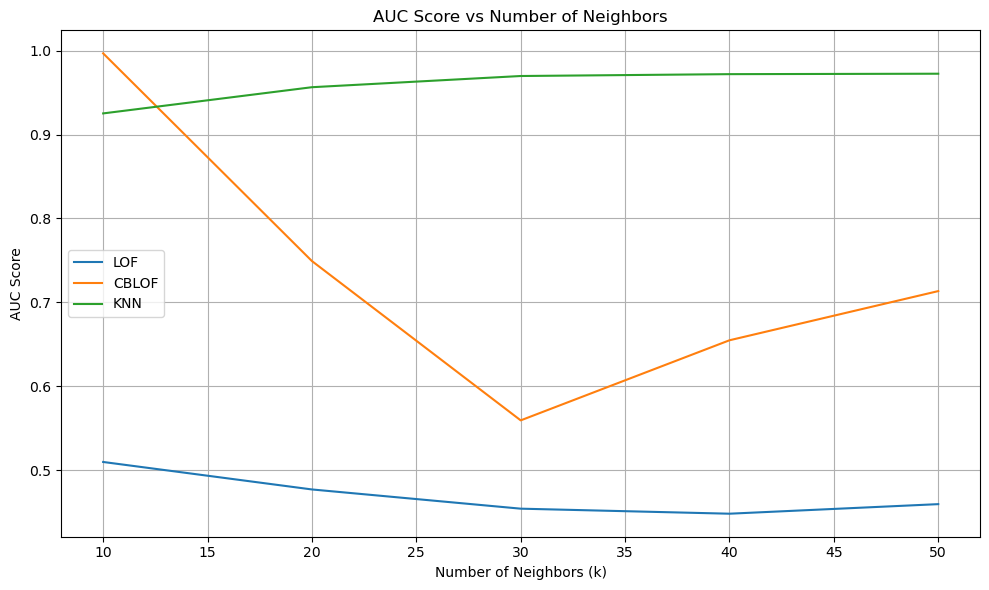

In [18]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    # cof_model = COF(n_neighbors=n_neighbors)
    # cof_model.fit(df)
    # y_scores_cof = cof_model.decision_function(df)
    # cof_pred = cof_model.labels_
    # auc_cof = roc_auc_score(y, y_scores_cof)

    # auc_scores_cof.append(auc_cof)
    # accuracy_cof = accuracy_score(y, cof_pred)
    # accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
# mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
# mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
# print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
# print("COF acc",mean_acc_cof)



KNN auc 0.9591070800920276
LOF auc 0.4699617844146891
CBLOF auc 0.7347976594740404
KNN acc 0.9147942493112946
LOF acc 0.8854984504132231
CBLOF acc 0.9017949380165289
